In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings

warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('../data/all_seasons.csv')

In [4]:
df.drop(columns='Unnamed: 0',inplace = True)

In [5]:
numerical_data = df.select_dtypes(include = np.number).columns.to_list()
catogrical_data = df.select_dtypes(exclude= np.number).columns.to_list()
for label in enumerate(catogrical_data):
    print(label)

(0, 'player_name')
(1, 'team_abbreviation')
(2, 'college')
(3, 'country')
(4, 'draft_year')
(5, 'draft_round')
(6, 'draft_number')
(7, 'season')


In [6]:
df.describe().round()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0,12844.0
mean,27.0,201.0,100.0,51.0,8.0,4.0,2.0,-2.0,0.0,0.0,0.0,1.0,0.0
std,4.0,9.0,12.0,25.0,6.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0
min,18.0,160.0,60.0,1.0,0.0,0.0,0.0,-250.0,0.0,0.0,0.0,0.0,0.0
25%,24.0,193.0,91.0,31.0,4.0,2.0,1.0,-6.0,0.0,0.0,0.0,0.0,0.0
50%,26.0,201.0,100.0,57.0,7.0,3.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0
75%,30.0,208.0,109.0,73.0,12.0,5.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0
max,44.0,231.0,163.0,85.0,36.0,16.0,12.0,300.0,1.0,1.0,1.0,2.0,1.0


In [7]:
df["college"] = df["college"].fillna("DNE")

In [8]:
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

## EDA

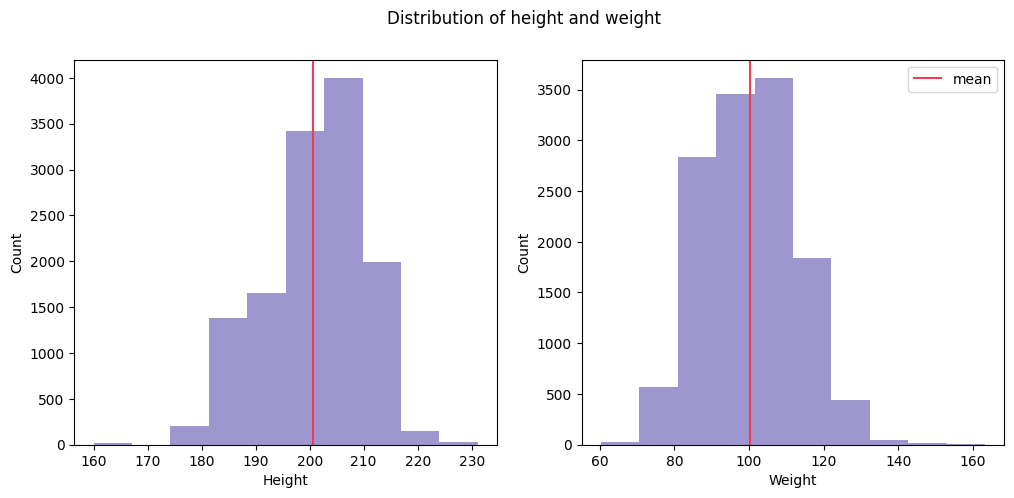

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

plt.suptitle("Distribution of height and weight")

# first plot
ax1.hist(df["player_height"],color='#9E96CF')
ax1.axvline(df["player_height"].mean(),color='#EF3D58',label="mean")
ax1.set_xlabel("Height")
ax1.set_ylabel("Count")

#second plot
ax2.hist(df["player_weight"],color='#9E96CF')
ax2.axvline(df["player_weight"].mean(),color='#EF3D58',label="mean")
ax2.set_xlabel("Weight")
ax2.set_ylabel("Count")

plt.legend()
plt.show()

In [10]:
data = go.Scatter(
x=df['player_height'],
y=df['player_weight'],
mode='markers',
marker=dict(color='#4A4C76')
)
layout = go.Layout(height=750,
                   width=950,
                   title={
                       'text': "Height vs Weight",
                       'x': 0.4,
                       'y': 0.93,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   },
                   xaxis={'title': 'Height'},
                   yaxis=dict(title='Weight'),
                   template='plotly_white')
fig = go.Figure(data = data , layout = layout)
fig.show()

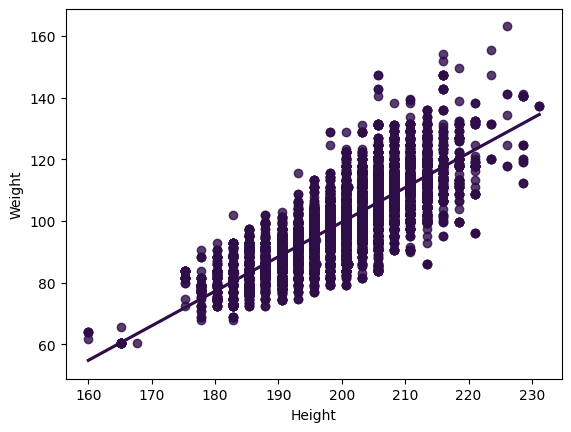

In [11]:
sns.regplot(df,x='player_height',y='player_weight',color='#2E0D49')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

> 从上面可以发现身高和体重之间的关系在 NBA 球员是线性的

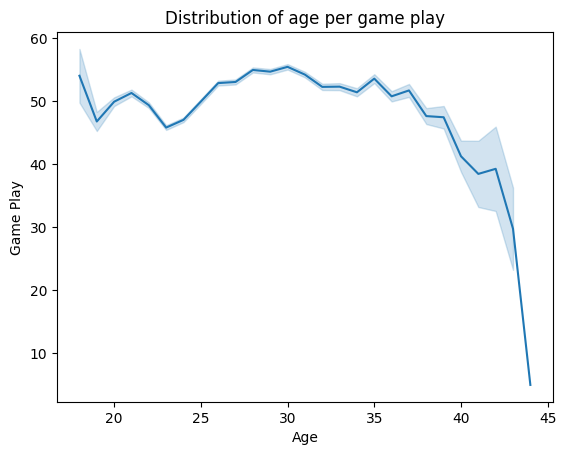

In [12]:
sns.lineplot(df,x='age',y='gp',errorbar=("se", 0.5))
plt.title("Distribution of age per game play")
plt.xlabel("Age")
plt.ylabel("Game Play")
plt.show()

> 从上面可以发现球员年龄越大，参加的比赛就越少

In [13]:
season_group = df.groupby(df['season']).agg({'age':'mean','player_height':'mean','player_weight':'mean'})
season_group.reset_index(inplace=True)

> 现在建立了季节与身高、体重、年龄平均值之间的关系

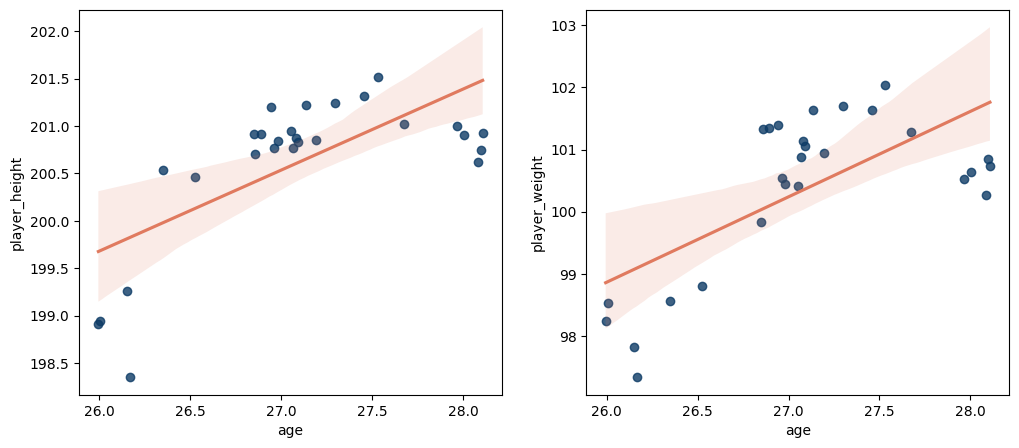

In [14]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.axes_style()
sns.regplot(season_group,x='age',y='player_height',line_kws={'color':'#e07a5f'},color='#0d3b66',ax=ax[0])
sns.regplot(season_group,x='age',y='player_weight',line_kws={'color':'#e07a5f'},color='#0d3b66',ax=ax[1])    
plt.show()

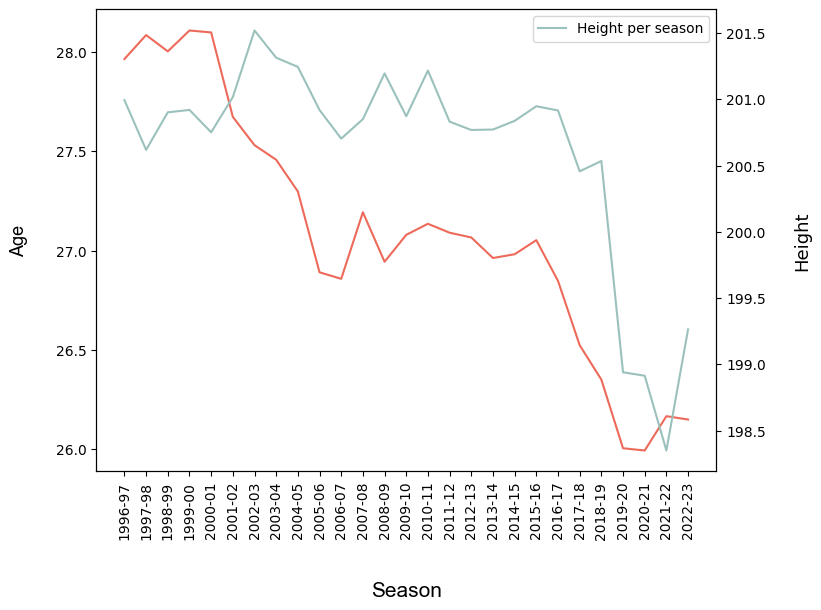

In [15]:
fig,ax = plt.subplots(figsize=(8, 6))

# first plot
ax.plot(season_group['season'],season_group['age'],color='#ed6a5a')
ax.set_xlabel('Season',labelpad=30,fontsize=15,fontname='Arial')
ax.set_ylabel('Age',labelpad=20,fontsize=13,fontname='Arial')

# second
ax_right = plt.twinx()
ax_right.plot(season_group['season'],season_group['player_height'], color='#9bc1bc',label='Height per season')
ax_right.set_ylabel('Height',fontsize=13,labelpad=20)
ax_right.legend()

ax.set_xticklabels(season_group['season'],rotation='vertical')
plt.show()

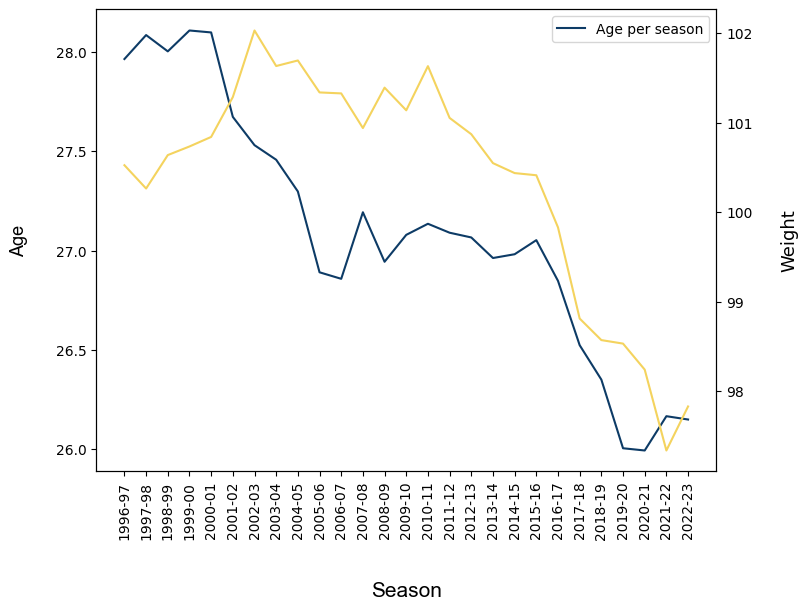

In [16]:
fig,ax = plt.subplots(figsize =(8, 6))

# first plot
ax.plot(season_group['season'],season_group['age'],color='#0d3b66',label='Age per season')
ax.set_xlabel('Season',labelpad=30,fontsize=15,fontname='Arial')
ax.set_ylabel('Age',labelpad=20,fontsize=13,fontname='Arial')
ax.legend()

# second
ax_right = plt.twinx()
ax_right.plot(season_group['season'],season_group['player_weight'], color='#f4d35e')
ax_right.set_ylabel('Weight',fontsize=13,labelpad=20)


ax.set_xticklabels(season_group['season'],rotation='vertical')
plt.show()

> 从上面我们可以发现，多年来球队中球员的年龄有所下降，体重和身高也略有下降

In [17]:
teamGroup = df.groupby("team_abbreviation").aggregate({'age':'mean','player_height':'mean','player_weight':'mean'})
teamGroup.reset_index(inplace = True)

> 建立球队与身高、体重和年龄平均值之间的关系

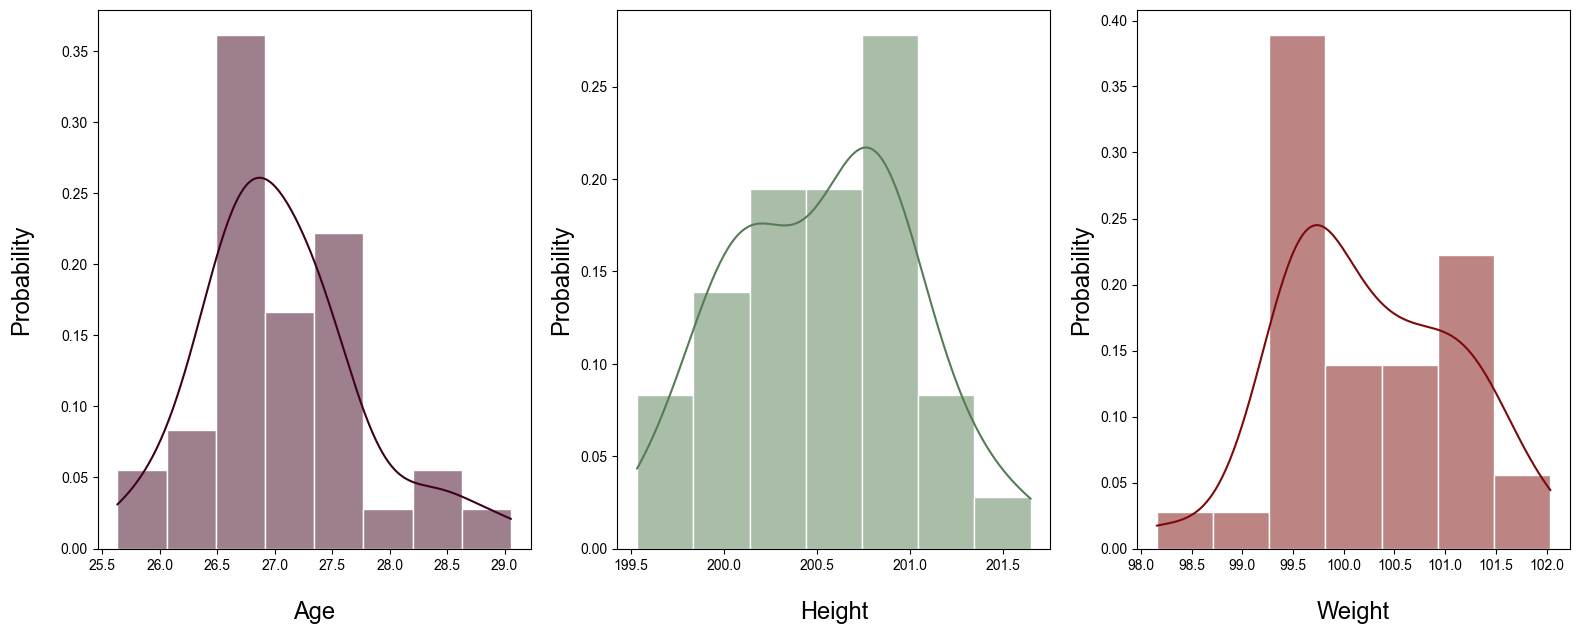

In [18]:
fig , (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(19,7))

sns.axes_style()

sns.set_theme(style='white')

# first
sns.histplot(teamGroup,x='age',kde=True,stat="probability",ax=ax1,color='#3E001F')
ax1.set_xlabel('Age',fontsize=17,labelpad=20)
ax1.set_ylabel('Probability',fontsize=17,labelpad=20)


#second
sns.histplot(teamGroup,x='player_height',stat="probability",kde=True,ax=ax2,color='#557C55')
ax2.set_xlabel('Height',fontsize=17,labelpad=20)
ax2.set_ylabel('Probability',fontsize=17,labelpad=5)


#third
sns.histplot(teamGroup,x='player_weight',stat="probability",kde=True,ax=ax3,color='#7D0A0A')
ax3.set_xlabel('Weight',fontsize=17,labelpad=20)
ax3.set_ylabel('Probability',fontsize=17,labelpad=5)



plt.show()